In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salaries = pd.read_csv('./files/Salaries.csv')
schools = pd.read_csv('./files/Schools.csv')

In [4]:
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [5]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
college = pd.read_csv('./files/CollegePlaying.csv')
college.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


schools and salary related?

In [24]:
salaries_college = pd.merge(salaries,college.iloc[:,:2], on='playerID')
salaries_college.head()

,yearID,teamID,lgID,playerID,salary,schoolID
0,1985,ATL,NL,bedrost01,550000,newhaven
1,1986,PHI,NL,bedrost01,650000,newhaven
2,1987,PHI,NL,bedrost01,1050000,newhaven
3,1988,PHI,NL,bedrost01,925000,newhaven
4,1989,PHI,NL,bedrost01,1450000,newhaven


In [28]:
salaries_college_full = pd.merge(salaries_college,schools, on='schoolID')
salaries_college_full.head()

,yearID,teamID,lgID,playerID,salary,schoolID,name_full,city,state,country
0,1985,ATL,NL,bedrost01,550000,newhaven,University of New Haven,West Haven,CT,USA
1,1986,PHI,NL,bedrost01,650000,newhaven,University of New Haven,West Haven,CT,USA
2,1987,PHI,NL,bedrost01,1050000,newhaven,University of New Haven,West Haven,CT,USA
3,1988,PHI,NL,bedrost01,925000,newhaven,University of New Haven,West Haven,CT,USA
4,1989,PHI,NL,bedrost01,1450000,newhaven,University of New Haven,West Haven,CT,USA


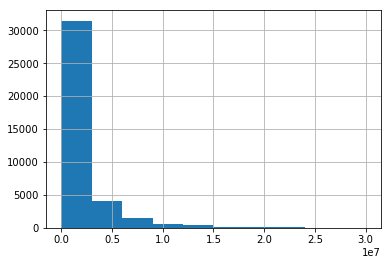

In [42]:
%matplotlib inline

salaries_college_full['salary'].hist()

plt.show()

In [47]:
state_salary = salaries_college_full.ix(:,['salary':'state'])
state_salary.head()

SyntaxError: invalid syntax (<ipython-input-47-292187f556aa>, line 1)